In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [4]:
clusters_count = [2, 4, 6, 8, 10 ]
kmeans = KMeans(random_state = 4)

In [5]:
heart_data = pd.read_csv('tsne_hd.csv', sep=',')
auto_data = pd.read_csv('tsne_mpg.csv', sep=',')

In [6]:
# heart_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
# auto_features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

In [7]:
heart_features = ['0','1','2','3','4']
auto_features = ['0','1','2','3','4','5','6']
x_heart = heart_data[heart_features]  
y_heart = heart_data.target
x_auto = auto_data[auto_features] 
y_auto = auto_data.mpg


In [8]:
#for heart data

plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [9]:
for count in clusters_count:
    kmeans.set_params(n_clusters = count)
    kmeans.fit(x_heart)
    labels = kmeans.predict(x_heart)

    silhouette_avg = silhouette_score(x_heart, labels)
    
    plotx.append(count)
    ploty.append(silhouette_avg)


    plot_dict[count] = silhouette_avg


/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[0.2341829155913891, 0.2456296550703435, 0.217664642074202, 0.1996817334874906, 0.19783766133256156]


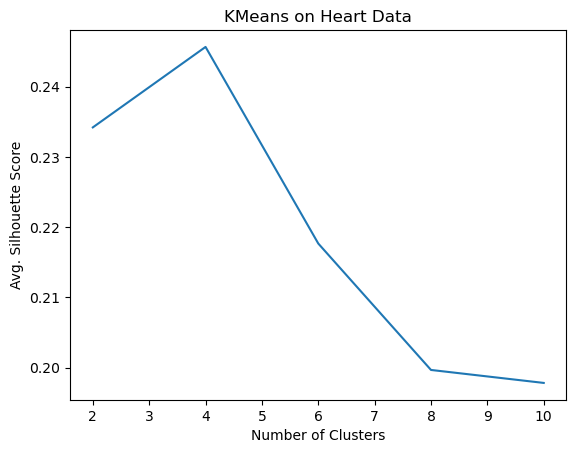

In [10]:
plt.figure()
plt.title('KMeans on Heart Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. Silhouette Score')
print(ploty)

In [11]:
#for mpg data

plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [12]:
for count in clusters_count:
    kmeans.set_params(n_clusters = count)
    kmeans.fit(x_auto)
    labels = kmeans.predict(x_auto)

    silhouette_avg = silhouette_score(x_auto, labels)
    
    plotx.append(count)
    ploty.append(silhouette_avg)


    plot_dict[count] = silhouette_avg

/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

Text(0, 0.5, 'Avg. Silhouette Score')

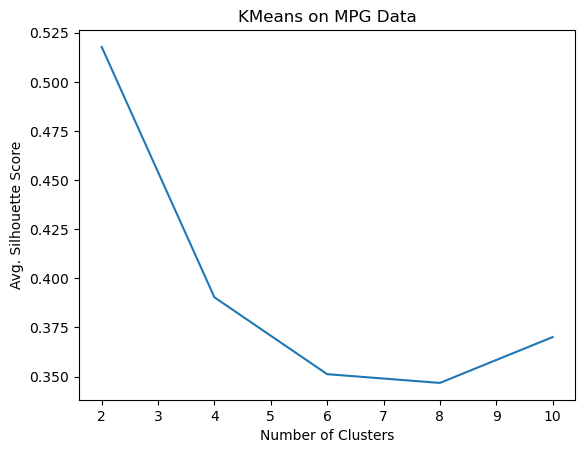

In [13]:
plt.figure()
plt.title('KMeans on MPG Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg. Silhouette Score')

In [14]:
# Expectation Maximum
gaus = GaussianMixture(random_state = 4)


In [15]:
# heart data
plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [16]:
for count in clusters_count:
    gaus.set_params(n_components = count)
    gaus.fit(x_heart)
    labels = gaus.predict(x_heart)

    silhouette_avg = silhouette_score(x_heart, labels)
    plotx.append(count)
    ploty.append(silhouette_avg)
    plot_dict[count] = silhouette_avg


Text(0, 0.5, 'Avg. Silhouette Score')

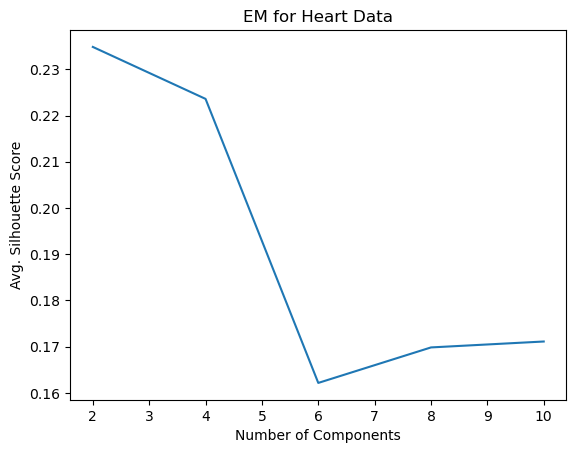

In [17]:
plt.figure()
plt.title('EM for Heart Data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Components')
plt.ylabel('Avg. Silhouette Score')

In [18]:
# for mpg data
plt.figure()

plotx = []
ploty = []
plot_dict = {}

<Figure size 640x480 with 0 Axes>

In [19]:
for count in clusters_count:
    gaus.set_params(n_components = count)
    gaus.fit(x_auto)
    labels = gaus.predict(x_auto)

    silhouette_avg = silhouette_score(x_auto, labels)
    plotx.append(count)
    ploty.append(silhouette_avg)
    plot_dict[count] = silhouette_avg

Text(0, 0.5, 'Avg. Silhouette Score')

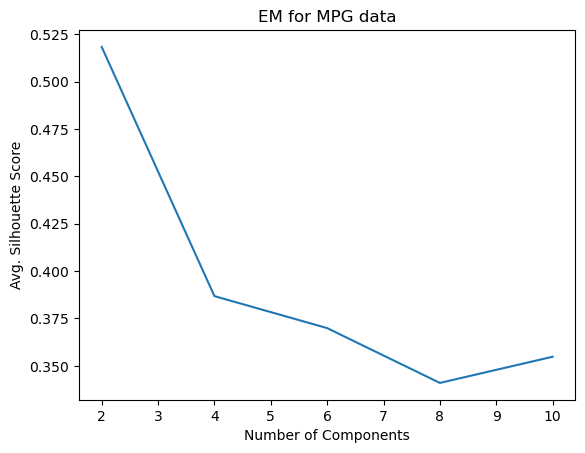

In [20]:
plt.figure()
plt.title('EM for MPG data')
plt.plot(plotx,ploty)
plt.xlabel('Number of Components')
plt.ylabel('Avg. Silhouette Score')